In [1]:
import pandas as pd

df = pd.read_csv("valorant_bots.csv")

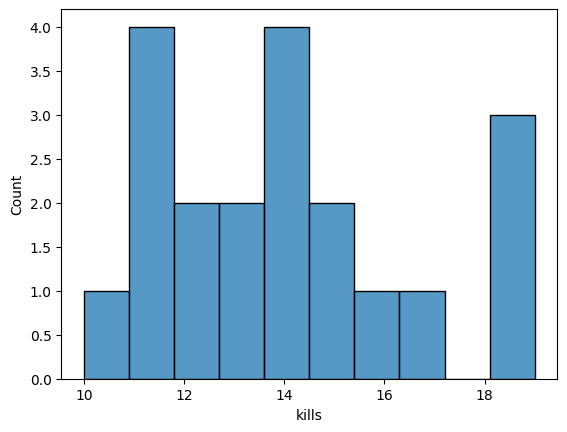

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df["kills"], bins=10)
plt.show()

In [8]:
from pymongo.mongo_client import MongoClient
from pymongo.server_api import ServerApi
import os
from dotenv import load_dotenv

class MongoDatabaseHandler:

    def __init__(self, client: MongoClient) -> None:
        self._client = client

        self._db = client.database

        self.benchmarks = self._db.benchmarks
        self.users = self._db.users

def get_client(uri) -> MongoClient:
    return MongoClient(host=uri, server_api=ServerApi("1"))

load_dotenv(".env")
user = os.environ.get("MONGO_USER")
passwd = os.environ.get("MONGO_PASSWD")
cluster = os.environ.get("MONGO_CLUSTER")
code = os.environ.get("MONGO_CODE")
if any([user is None, passwd is None, cluster is None, code is None]):
    raise Exception("Error al cargar credenciales")
uri = f"mongodb+srv://{user}:{passwd}@{cluster.lower()}.{code}.mongodb.net/?retryWrites=true&w=majority&appName={cluster}"
db = MongoDatabaseHandler(get_client(uri))

In [13]:
user = db.users.find_one({"username" : "cuicui"})
user["_id"]

ObjectId('66c751b4162fba90f1b05d54')

In [14]:
import datetime

db.benchmarks.insert(
    {
        "user_id" : user["_id"],
        "valorant_bots" : {
            "difficulty" : "hard",
            "weapon" : "vandal",
            "scores" : [19,11,14,14,14,12,11,16,17,11,13,13,19,10,12,19,15,14,11,15]
        },
        "submitted_at" : datetime.datetime.now(datetime.UTC) - datetime.timedelta(days=1),
        "dpi" : 800,
        "val_sens" : {
            "value" : 0.2
        },
        "mouse_curve" : "S-plateau"
    }
)

TypeError: 'Collection' object is not callable. If you meant to call the 'insert' method on a 'Collection' object it is failing because no such method exists.